In [1]:
"""
Code to convert all .dat files (ECG signals) in a folder to CSV format
@author: Abhishek Patil
"""

'\nCode to convert all .dat files (ECG signals) in a folder to CSV format\n@author: Abhishek Patil\n'

In [1]:
import wfdb
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
import csv

In [2]:
dat_files=glob.glob('*.dat') #Get list of all .dat files in the current folder
df=pd.DataFrame(data=dat_files)
df.to_csv("files_list.csv",index=False,header=None)

In [2]:
files = pd.read_csv("files_list.csv", header=None)

In [5]:
for i in range(1, len(files)+1):    # 왜 1~len(files)+1 인지는 모르겠지만
    record_name=str(files.iloc[[i]])
    print(record_name[:-4])
    recordname_new=record_name[-7:-4] #Extracting just the filename part (will differ from database to database)
    record = wfdb.rdsamp(recordname_new) # rdsamp() returns the signal as a numpy array
    record=np.asarray(record[0])
    path=recordname_new+".csv"
    np.savetxt(path,record,delimiter=",") #Writing the CSV for each record
    print("Files done: %s/%s"% (i,len(files)))
print("\nAll files done!")

         0
1  114
Files done: 1/48
         0
2  117
Files done: 2/48
         0
3  116
Files done: 3/48
         0
4  111
Files done: 4/48
         0
5  113
Files done: 5/48
         0
6  109
Files done: 6/48
         0
7  112
Files done: 7/48
         0
8  108
Files done: 8/48
         0
9  100
Files done: 9/48
          0
10  101
Files done: 10/48
          0
11  102
Files done: 11/48
          0
12  118
Files done: 12/48
          0
13  103
Files done: 13/48
          0
14  119
Files done: 14/48
          0
15  124
Files done: 15/48
          0
16  104
Files done: 16/48
          0
17  123
Files done: 17/48
          0
18  105
Files done: 18/48
          0
19  122
Files done: 19/48
          0
20  121
Files done: 20/48
          0
21  106
Files done: 21/48
          0
22  107
Files done: 22/48
          0
23  203
Files done: 23/48
          0
24  219
Files done: 24/48
          0
25  202
Files done: 25/48
          0
26  201
Files done: 26/48
          0
27  200
Files done: 27/48
 

IndexError: positional indexers are out-of-bounds

In [6]:
i=0
record_name=str(files.iloc[[i]])
print(record_name[:-4])
recordname_new=record_name[-7:-4] #Extracting just the filename part (will differ from database to database)
record = wfdb.rdsamp(recordname_new) # rdsamp() returns the signal as a numpy array
record=np.asarray(record[0])
path=recordname_new+".csv"
np.savetxt(path,record,delimiter=",") #Writing the CSV for each record
print("Files done: %s/%s"% (i,len(files)))

         0
0  115
Files done: 0/48


In [2]:
# see one csv file
example_file = pd.read_csv('./230.csv', header=None)
example_file

,0,1
0,-0.380,-0.285
1,-0.380,-0.285
2,-0.380,-0.285
3,-0.380,-0.285
4,-0.380,-0.285
...,...,...
649995,-0.600,-0.150
649996,-0.605,-0.160
649997,-0.590,-0.160
649998,-0.590,-0.145


14400   -0.220
14401   -0.215
14402   -0.225
14403   -0.210
14404   -0.210
         ...  
17995   -0.225
17996   -0.215
17997   -0.215
17998   -0.195
17999   -0.165
Name: MLII, Length: 3600, dtype: float64


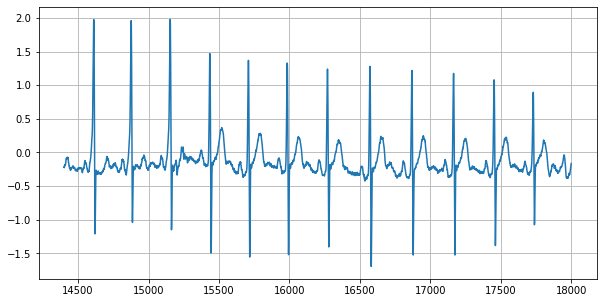

In [3]:
# visualize
filename = './230.csv'
example_file = pd.read_csv(filename, header=None)
example_file.columns = ['MLII', 'V5']

idx = 14400
MLII = example_file['MLII'][idx:idx+3600]
plt.rcParams['figure.figsize'] = (10, 5)
print(MLII)
plt.grid(True)
plt.plot(MLII)

14400    0.160
14401    0.180
14402    0.195
14403    0.200
14404    0.210
         ...  
17995   -0.105
17996   -0.100
17997   -0.115
17998   -0.095
17999   -0.070
Name: V5, Length: 3600, dtype: float64


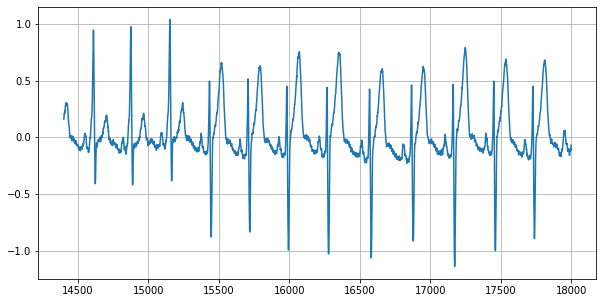

In [4]:
filename = './230.csv'
example_file = pd.read_csv(filename, header=None)
example_file.columns = ['MLII', 'V5']

idx = 14400
V5 = example_file['V5'][idx:idx+3600]
plt.rcParams['figure.figsize'] = (10, 5)
print(V5)
plt.grid(True)
plt.plot(V5)

In [5]:
# cropping example
fc = 360
sec = 10
unit = fc * sec

record_name = '230'
with open(record_name + '.csv', 'r', newline="") as rd:
    reader = csv.reader(rd)
    
    data = np.array(list(reader))
    l2 = data[:, 0]
    
    start = 0
    end = unit        

In [12]:
# cropping code
files = pd.read_csv('./files_list.csv', header=None)
writer_path = '../mitdb_processed/'

fc = 360
sec = 10
unit = fc * sec    

In [5]:
aa = l2[start:end]

In [6]:
aa.shape

(3600,)

In [7]:
l2.shape

(650000,)

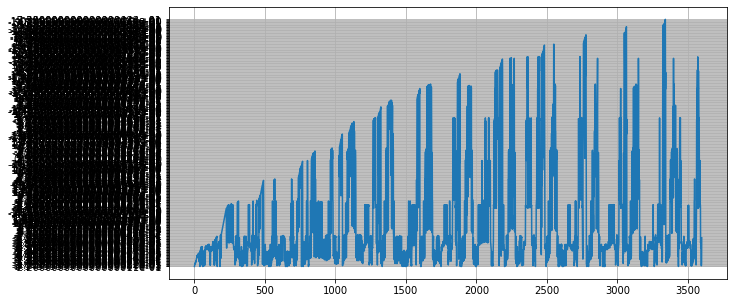

In [8]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.grid(True)
idx = 14400
plt.plot(l2[idx:idx + 3600])

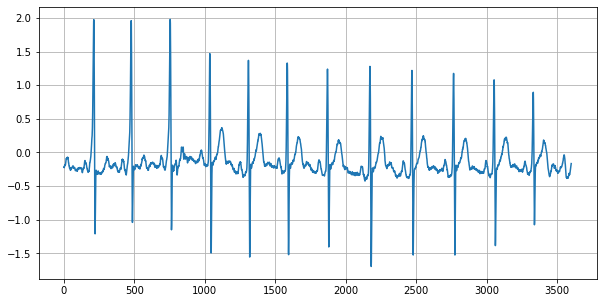

In [5]:
bb = np.array(l2[idx:idx+3600], dtype=float)
plt.rcParams['figure.figsize'] = (10, 5)
plt.grid(True)
idx = 14400
plt.plot(bb)

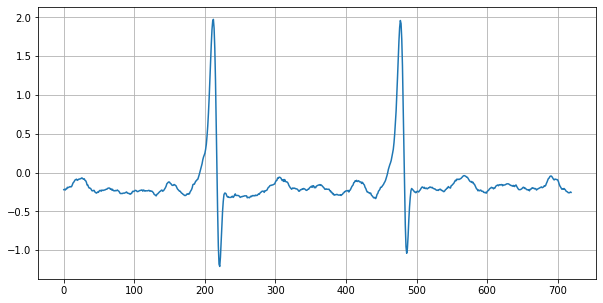

In [6]:
bb = np.array(l2[idx:idx+360*2], dtype=float)
plt.rcParams['figure.figsize'] = (10, 5)
plt.grid(True)
idx = 14400
plt.plot(bb)

In [22]:
# Los Pass Filter
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

In [19]:
T = 2.0     # Sample Period
fs = 360    # sample rate, Hz
cutoff = 35 # desired cutoff freqeunc of the filter, Hz
t = np.linspace(0, T, int(T * fs))

nyq = 0.5 * fs   # Nyquist Frequency

order = 2  # how much smooth we want
n = int(T * fs)

In [20]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

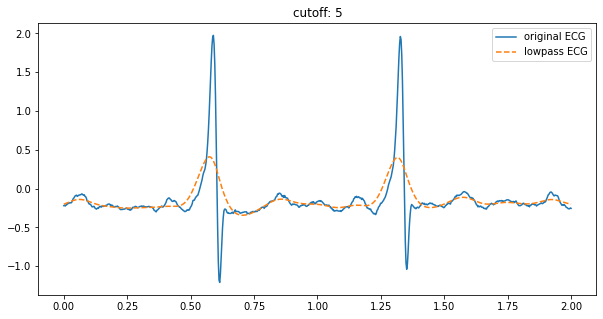

In [29]:
### plot the result
cutoff = 5
y = butter_lowpass_filter(bb, cutoff, fs, order)

plt.figure()
plt.plot(t, bb, label ='original ECG')
plt.plot(t, y, label ='lowpass ECG', linestyle='--')
plt.legend()
plt.title('cutoff: {}'.format(cutoff))
plt.show()

In [28]:
max(t)

2.0

In [11]:
# check foureir expansion
from symfit import parameters, variables, sin, cos, Fit

def fourier_series(x, f, n=0):
    cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(0, n + 1)]))

    series = sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b)))
    return series

In [14]:
best_n = 0
best_rsquared = 0.
# for n in range(200, 300, 10):
#     print('Proceeding: ', n)
#     # in our model, fit sin(1.7x)
#     x, y = variables('x, y')
#     model_dict = {y: fourier_series(x, f=1, n=n)}
    
#     x_data = np.linspace(0, 360*2, 360*2)
#     y_data = bb
#     fit = Fit(model_dict, x=x_data*2, y=y_data)
#     fit_result = fit.execute()
    
#     if best_rsquared < fit_result.r_squared:
#         best_rsquared = fit_result.r_squared
#         best_n = n
#         print(n)
#         best_fit = fit_result

x, y = variables('x, y')
model_dict = {y: fourier_series(x, f=1, n=290)}

x_data = np.linspace(0, 360, 360*2)
y_data = bb
fit = Fit(model_dict, x=x_data, y=y_data)
fit_result = fit.execute()

In [ ]:
# in our model, fit sin(1.7x)
x, y = variables('x, y')
model_dict = {y: fourier_series(x, f=1, n=150)}
print(model_dict)

In [ ]:
x_data = np.linspace(0, 360*2, 360*2)
y_data = bb
fit = Fit(model_dict, x=x_data, y=y_data)
fit_result = fit.execute()
print(fit_result)

In [ ]:
fit_result.r_squared

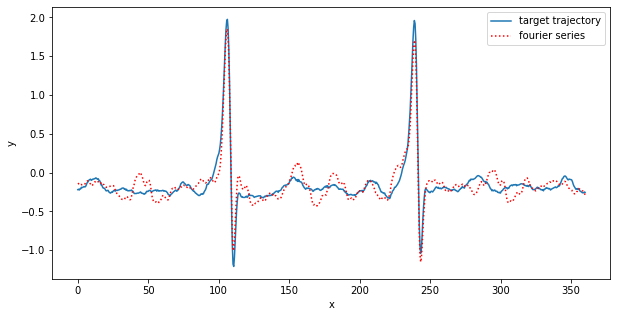

In [16]:
plt.plot(x_data, y_data, label='target trajectory')
#plt.scatter(x_data, y_data, label='samples')
plt.plot(x_data, fit.model(x=x_data, **fit_result.params).y, ls=':', color='red', label='fourier series')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

In [23]:
param_dict = dict(fit_result.params)

In [27]:
param_dict['b188']

0.1401536064712491

In [ ]:
import operator
dict(sorted(param_dict.items(), key=operator.itemgetter(1), reverse=True))

In [ ]:
plt.scatter(x_data, y_data, label='samples')
plt.show()

In [7]:
### scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [ ]:
bb = np.array(l2[idx:idx+360*2], dtype=float)
plt.rcParams['figure.figsize'] = (10, 5)
plt.grid(True)
idx = 14400
plt.plot(bb)

In [8]:
len(bb)

720

In [30]:
x = np.linspace(0, 2, len(bb))
y = bb
terms = 100
L = len(bb)

# Calculation of coefficients
a0 = 2./L*simps(y, x)
an = lambda n: 2.0 / L * simps(y * np.cos(2.*np.pi * n * x/L), x)
bn = lambda n: 2.0 / L * simps(y * np.sin(2.*np.pi * n * x/L), x)

# Sum of the series
s = a0/2. + sum([an(k)*np.cos(2. * np.pi * k * x/L) + bn(k)*np.sin(2.*np.pi*k*x/L) for k in range(1, terms+1)])

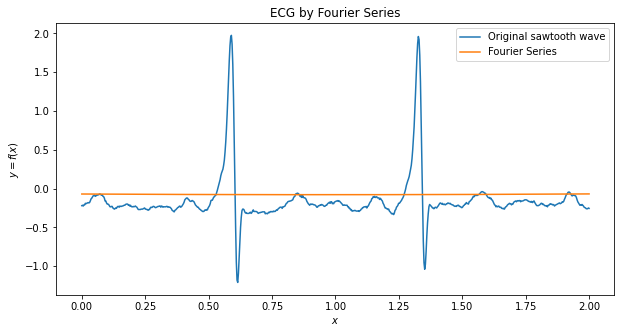

In [32]:
# Plotting
plt.plot(x, y, label = 'Original sawtooth wave')
plt.plot(x, s, label = 'Fourier Series')
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.legend(loc='best', prop={'size': 10})
plt.title('ECG by Fourier Series')
plt.show()

In [33]:
s

array([-0.07009743, -0.07014601, -0.07019447, -0.07024281, -0.07029103,
       -0.07033913, -0.0703871 , -0.07043496, -0.0704827 , -0.07053031,
       -0.07057781, -0.07062518, -0.07067243, -0.07071956, -0.07076657,
       -0.07081345, -0.07086022, -0.07090686, -0.07095338, -0.07099977,
       -0.07104604, -0.07109219, -0.07113822, -0.07118412, -0.0712299 ,
       -0.07127556, -0.07132109, -0.0713665 , -0.07141178, -0.07145694,
       -0.07150197, -0.07154688, -0.07159167, -0.07163633, -0.07168086,
       -0.07172527, -0.07176956, -0.07181372, -0.07185775, -0.07190166,
       -0.07194544, -0.07198909, -0.07203262, -0.07207602, -0.0721193 ,
       -0.07216245, -0.07220547, -0.07224837, -0.07229113, -0.07233377,
       -0.07237629, -0.07241867, -0.07246093, -0.07250306, -0.07254506,
       -0.07258693, -0.07262868, -0.07267029, -0.07271178, -0.07275314,
       -0.07279437, -0.07283547, -0.07287644, -0.07291728, -0.07295799,
       -0.07299858, -0.07303903, -0.07307935, -0.07311954, -0.07